In [ ]:
# 사용가능한 시스템의 TTF 폰트 목록
import matplotlib.font_manager as font_manager

font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

print('사용가능한 TTF 폰트 개수:', len(font_list))
font_list[:10] # 목록에서 처음 10 개만 보기

In [1]:
from PIL import Image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

from konlpy.tag import Okt

from functools import reduce
from wordcloud import WordCloud

In [2]:
DATA_IN_PATH = './'

In [3]:
data = pd.read_csv(DATA_IN_PATH + 'mobile.csv', encoding='utf-8')

In [4]:
data

,data,label
0,직업개요\n\n스마트폰에 탑재할 각종 어플리케이션 프로그램을 개발한다.\n\n\n\...,mobile
1,1. 이 직업을 소개해 주세요\n 스마트폰에 적용될 다양한 프로그램 개발전문가 ‘스...,mobile
2,“스마트폰이 우리의 경쟁 상대가 되리라곤 전혀 상상하지 못했습니다!”\n\n부동의 ...,mobile
3,남녀노소 할 것 없이 사용하고 있는 스마트폰\n어플리케이션 없이는 스마트폰을 쓸 필...,mobile
4,지금 당장 휴대폰을 켜서 애플리케이션을 보거나\n\n플레이스토어에 들어가서 다양한 ...,mobile
5,스마트폰 앱개발 공부하는데 고민되는 건 아마 크게 2가지 정도일 겁니다. \n\n\...,mobile
6,어떤일을 하나요?\n스마트폰애플리케이션개발자는 스마트폰에 탑재할 애플리케이션 프로그...,mobile
7,컴퓨터 언어 능력 ‘필수’ 논리적ㆍ수학적 사고와 기획력 갖춰야\n\n스마트폰의 출...,mobile
8,"[잡포스트/직업] 홍승표 기자 = 최근 스마트폰, 태블릿 PC 등 모바일기기가 급진...",mobile
9,"모바일앱개발자는 모바일기기에서 사용되는 프로그램, 고객의 요구에 적합한 어플리케이션...",mobile


In [5]:
okt = Okt()
query_sentences = list(data['data'])

query_NVA_token_sentences = list()

for s in query_sentences:
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            query_NVA_token_sentences.append(token)

query_NVA_token_sentences = ' '.join(query_NVA_token_sentences)

print(query_NVA_token_sentences)

직업 개요 스마트폰 탑재 할 각종 어플리케이션 프로그램 개발 한다 업무 내용 스마트폰 탑재 할 웹어플리케이션 프로그램 아이템 기획 한다 스마트폰 가동 되는 앱 프로그램 개발 개발 된 앱 프로그램 오류 수정 새로운 버전 앱 프로그램 개발 필요 적성 능력 성격 혁신 성취 노력 책임 진취 분석 사고 독립성 흥미 탐구 예술 직업 가치관 다양성 심신 안녕 신체 활동 지적 추구 자율 업무 수행 필요 능력 창의력 전산 수리 범주 기술 분석 필요 지식 통신 컴퓨터 전자공학 의사소통 미디어 학과 기술 디자인 업무 환경 정밀 정확성 정신 업무 반복 고용 기회 앉아서 근무 새로운 기술 습득 교육 자격 스마트폰 콘텐츠 학과 최근 신설 되고있지만 스마트폰 앱 개발자 양성 목적 공부 시키는 대학 관련 학과 많지 않다 업무 특성 컴퓨터공학 전산 공학 과 소프트웨어 학과 응용소프트웨어 학과 게임 학과 등 전공 업무 하는데 도움 된다 스마트폰 출시 초기 학생 개인 개발자 만든 앱 이인기 끌었으나 시간 갈수록 개발자 기업 개발 팀 중심 시장 이재 편 되는 경향 보이 있다 이러한 앱 대한 관심 반영 듯 최근 앱 관련 학원 등 생겨나고있다 앱 개발 하기 위해 서는 그 맞는 디바이스 툴 있어야하고 기본 개발 언어 이해 필수 앱 개발자 프로그래밍 기술 기본 참신한 아이디어 그래픽 감각 갖춰 야한다 스마트폰 자체 기능 향상 된만큼 고객 그 부합 화려하고 감각 그래픽 요구 경향 있기 때문 따라서 스마트폰 가진 터치 기능 재미 주는 요소 콘텐츠 적용 창의력 필요하다 직업 전망 앞 스마트폰 앱 개발자 고용 증가 할것으로 전망 된다 이러한 스마트폰 보급 지속 확대 될것으로 예상 된다 스마트폰 가진 사람 많아짐에 따라 스마트폰 사용자 대상 날씨 여행 뉴스 운송 등 정보 제공 게임 인트라넷 편리한 기능 갖춘 어플리케이션 프로그램 개발 서비스 하려는 기업 개인 사업자 많아질것이다 스마트폰 시각 정보 인식 카메라 기능 위치 파악 케 해주는 인 텟 활용 뛰어난 그래픽 기능 갖추고있어 무궁무진 앱 프로그램 개발 할수있

In [6]:
query_NVA_token_sentences

'직업 개요 스마트폰 탑재 할 각종 어플리케이션 프로그램 개발 한다 업무 내용 스마트폰 탑재 할 웹어플리케이션 프로그램 아이템 기획 한다 스마트폰 가동 되는 앱 프로그램 개발 개발 된 앱 프로그램 오류 수정 새로운 버전 앱 프로그램 개발 필요 적성 능력 성격 혁신 성취 노력 책임 진취 분석 사고 독립성 흥미 탐구 예술 직업 가치관 다양성 심신 안녕 신체 활동 지적 추구 자율 업무 수행 필요 능력 창의력 전산 수리 범주 기술 분석 필요 지식 통신 컴퓨터 전자공학 의사소통 미디어 학과 기술 디자인 업무 환경 정밀 정확성 정신 업무 반복 고용 기회 앉아서 근무 새로운 기술 습득 교육 자격 스마트폰 콘텐츠 학과 최근 신설 되고있지만 스마트폰 앱 개발자 양성 목적 공부 시키는 대학 관련 학과 많지 않다 업무 특성 컴퓨터공학 전산 공학 과 소프트웨어 학과 응용소프트웨어 학과 게임 학과 등 전공 업무 하는데 도움 된다 스마트폰 출시 초기 학생 개인 개발자 만든 앱 이인기 끌었으나 시간 갈수록 개발자 기업 개발 팀 중심 시장 이재 편 되는 경향 보이 있다 이러한 앱 대한 관심 반영 듯 최근 앱 관련 학원 등 생겨나고있다 앱 개발 하기 위해 서는 그 맞는 디바이스 툴 있어야하고 기본 개발 언어 이해 필수 앱 개발자 프로그래밍 기술 기본 참신한 아이디어 그래픽 감각 갖춰 야한다 스마트폰 자체 기능 향상 된만큼 고객 그 부합 화려하고 감각 그래픽 요구 경향 있기 때문 따라서 스마트폰 가진 터치 기능 재미 주는 요소 콘텐츠 적용 창의력 필요하다 직업 전망 앞 스마트폰 앱 개발자 고용 증가 할것으로 전망 된다 이러한 스마트폰 보급 지속 확대 될것으로 예상 된다 스마트폰 가진 사람 많아짐에 따라 스마트폰 사용자 대상 날씨 여행 뉴스 운송 등 정보 제공 게임 인트라넷 편리한 기능 갖춘 어플리케이션 프로그램 개발 서비스 하려는 기업 개인 사업자 많아질것이다 스마트폰 시각 정보 인식 카메라 기능 위치 파악 케 해주는 인 텟 활용 뛰어난 그래픽 기능 갖추고있어 무궁무진 앱 프로그램 개발 할수

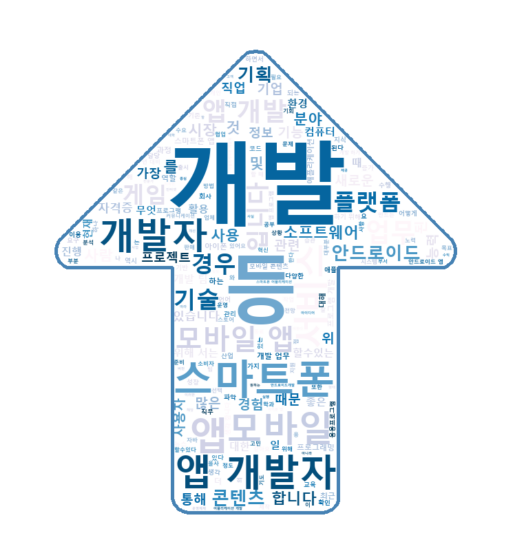

In [7]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud

we_mask = np.array(Image.open("test.png"))

wordcloud = WordCloud(
    font_path = 'C:\\Windows\\Fonts\\malgunbd.ttf',
    width = 800,
    height = 800,
    background_color="white",
    mask = we_mask,
    contour_width=5, contour_color='steelblue',
    colormap = 'PuBu'
)
#WordCloud(font_path= DATA_IN_PATH + 'HANCooljazzM.ttf').generate(query_NVA_token_sentences)
wordcloud = wordcloud.generate_from_text(str(query_NVA_token_sentences))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()




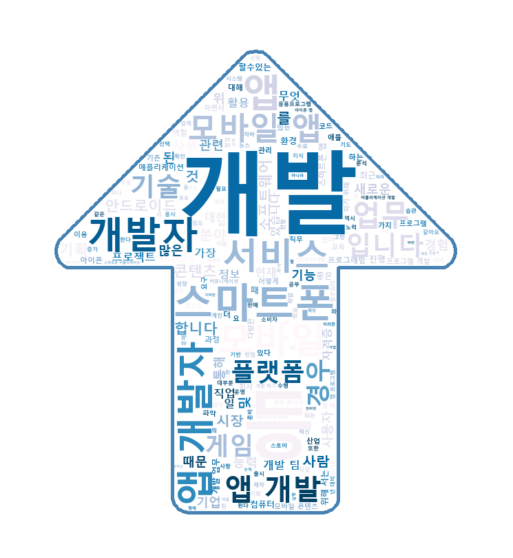

In [32]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud

we_mask = np.array(Image.open("test.png"))

wordcloud = WordCloud(
    font_path = 'C:\\Windows\\Fonts\\malgunbd.ttf',
    width = 800,
    height = 800,
    background_color="white",
    mask = we_mask,
    contour_width=5, contour_color='steelblue',
    colormap = 'PuBu'
)
#WordCloud(font_path= DATA_IN_PATH + 'HANCooljazzM.ttf').generate(query_NVA_token_sentences)
wordcloud = wordcloud.generate_from_text(str(query_NVA_token_sentences))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()




In [ ]:
#game

In [23]:
DATA_IN_PATH = './'
game = pd.read_csv(DATA_IN_PATH + 'game.csv', encoding='utf-8')

okt = Okt()
game_sentences = list(game['data'])

game_NVA_token_sentences = list()

for s in game_sentences:
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            game_NVA_token_sentences.append(token)

game_NVA_token_sentences = ' '.join(game_NVA_token_sentences)

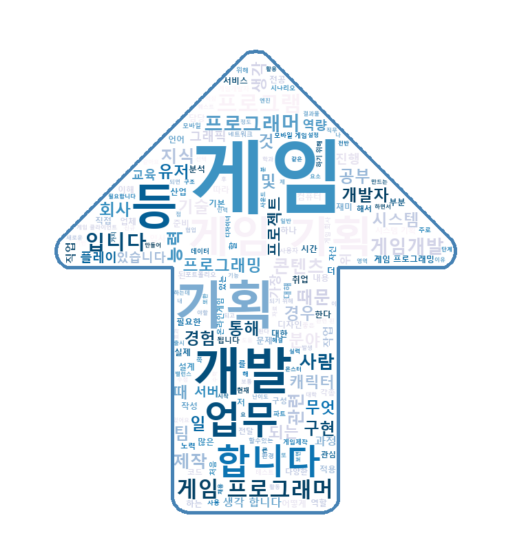

In [25]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud

we_mask = np.array(Image.open("test.png"))

wordcloud = WordCloud(
    font_path = 'C:\\Windows\\Fonts\\malgunbd.ttf',
    width = 800,
    height = 800,
    background_color="white",
    mask = we_mask,
    contour_width=5, contour_color='steelblue',
    colormap = 'PuBu'
)
#WordCloud(font_path= DATA_IN_PATH + 'HANCooljazzM.ttf').generate(query_NVA_token_sentences)
wordcloud = wordcloud.generate_from_text(str(game_NVA_token_sentences))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


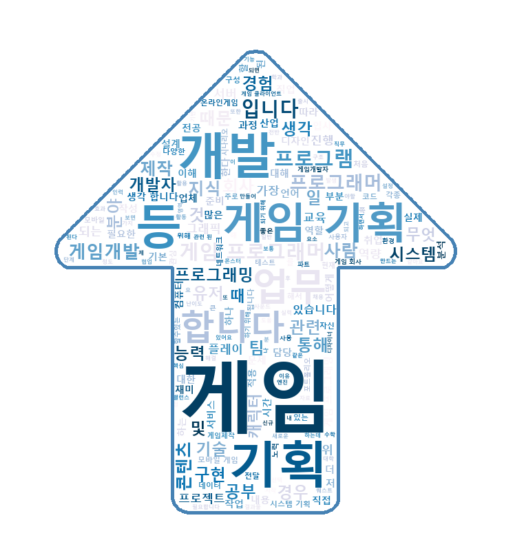

In [29]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud

we_mask = np.array(Image.open("test.png"))

wordcloud = WordCloud(
    font_path = 'C:\\Windows\\Fonts\\malgunbd.ttf',
    width = 800,
    height = 800,
    background_color="white",
    mask = we_mask,
    contour_width=5, contour_color='steelblue',
    colormap = 'PuBu'
)
#WordCloud(font_path= DATA_IN_PATH + 'HANCooljazzM.ttf').generate(query_NVA_token_sentences)
wordcloud = wordcloud.generate_from_text(str(game_NVA_token_sentences))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [33]:
game_NVA_token_sentences

'게임 디자이너 비디오 게임제작자 부류 영어 게임 디자이너 고도 한다 외래어 디자인 은 본래 설계 계획 그래픽 담당 직 그래픽 아트 사운드 포함 더 넓은 의미 아트 디자인 이라 고하 경우 있다 게임 다양한 분야 영역 믹스 된 영화 영역 진보 된 현대 프러덕션 할수있다 그래픽 음악 연기 스토리 촬영 컴퓨터 사이언스 제등 다양한 영역 필요 따라 게임 반영 된다 이러한 영역 이서 섞여 게임 결과물 바뀌도록 관리 해나 가는 사람 기획 기획 요구 되는 역량 게임 달라진다 기본 프로젝트 관리 역량 갖추어 야하며 추가 개발 할 게임 필요한 능력 전반 대해 알 야한다 시스템 게임 기반 되는 시스템 및 프로그램 개발 되는 요소 책임진다 프로그래밍 관련 지식 필요하다 시나리오 게임 기반 되는 스토리 캐릭터 퀘스트 등 와 등장 할 캐릭터 요소 책임진다 문화 예술 관련 지식 필요하다 레벨 디자인 게임 기반 되는 맵 사이즈 배치 요소 담당 건축 크기 공간 지식 플레이 타임 등 계산 할 게임 지식 필요하다 운영 게임 운영 업무 기획 내용 반영 되었을 때 운영 관련 내용 담당 라이브 기획 가주 기획 업무 병행 업무 밸런싱 게임 수치 담당 데이터 수학 지식 게임 룰 수치화 통찰 필요한다 게임 경제 게임 경제 시뮬레이션 할 능력 지식 필요하다 게임 몬스터 드랍 획득 게임머니 등 요소 담당 게임 크리에이터 게임 디자이너 게임 기획 게임 네트워크 게임 등 임용 소프트웨어 제작 관련 된 사항 총괄 지휘 감독 일 담당 게임 시장조사 등 통해 소비자 좋아하고 원하는 게임 무엇 를 파악 새로운 게임제작 위 아이디어 구상 하여이에 기획 안 작성 게임 장르 대상 연령 층 게임 난이도 게임 각종 캐릭터 역할 및 특징 기본 스토리 전개 등 설정 그래픽디자이너 프로그래머 등 본격 게임 프로그램 제작 게임 소프트웨어 베타테스트 하고시 연회 참여 등 홍보 업무 하기도 한다 대사 작성 등세 부적 게임 시나리오 작성 기획 도를이해 하기 쉽게 그래픽디자이너 프로그래머 등 전달 게임 제작 되어 상품화 되었을 때 시장 진

In [ ]:
#web

In [19]:
web = pd.read_csv(DATA_IN_PATH + 'web.csv', encoding='utf-8')

okt = Okt()
web_sentences = list(web['data'])

web_NVA_token_sentences = list()

for s in web_sentences:
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            web_NVA_token_sentences.append(token)

web_NVA_token_sentences = ' '.join(web_NVA_token_sentences)

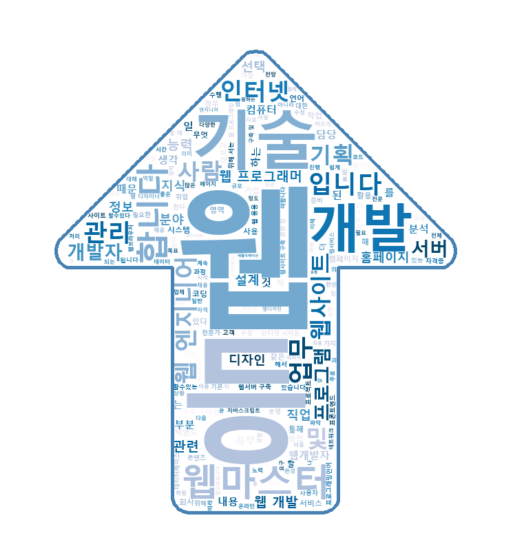

In [20]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud

we_mask = np.array(Image.open("test.png"))

wordcloud = WordCloud(
    font_path = 'C:\\Windows\\Fonts\\malgunbd.ttf',
    width = 800,
    height = 800,
    background_color="white",
    mask = we_mask,
    contour_width=5, contour_color='steelblue',
    colormap = 'PuBu'
)
#WordCloud(font_path= DATA_IN_PATH + 'HANCooljazzM.ttf').generate(query_NVA_token_sentences)
wordcloud = wordcloud.generate_from_text(str(web_NVA_token_sentences))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [35]:
web_NVA_token_sentences

'웹마스터 인터넷 사이트 게시판 관리 사이트 발생 문제 해결 일 담당 인터넷 사이트 게시판 등 관리 인터넷 사이트 제공 서비스 기능 향상 시키며 인터넷 사이트 정기 점검 유지 인터넷 사이트 발생 문제점 확인 문제점 직접 해결 거나 관련 개발자 통보 한다 컴퓨터 구조 및 시스템 인터넷 사이트 구축 등 지식 기술 요구 된다 기본 수리 능력 및 정보 분석 능력 가지 있어 야하며 문제 효과 해결 할수있는 분석 논리 사고 능력 필요하다 관습 진취 흥미 가진 사람 적합하며 협조 심 분석 사고 스트레스 감내 할수있는 성격 가진 사람 유리하다 공채 특채 교육 기관 소개 등 통해 인터넷 업체 인터넷 쇼핑몰 구축 업체 기업체 및 공공기관 전산실 시스템 통합 업체 등 채용 될수있다 웹마스터 종사 자수 명 향후 증가 할것으로 전망 된다 자료 중장 인력 수급 전망 인터넷 용이 생활화 되면서 공공 및 민간 기관 기업 들이 이동통신 통한 유비쿼터스 환경 다양한 응용소프트웨어 확대 되면서 웹마스터 고용 다소 증가 할 가능성 있다 자료 워크넷 직업 정보 웹마스터 평균 연봉 중위 값 은 자료 워크넷 직업 정보 웹마스터 되기 위해 서는 전문 대학 대학교 컴퓨터공학 관련 학과 졸업 것 유리하다 설교 기관 웹마스터 되기 위해 필요한 교육 훈련 받을수있다 관련 국가 자격증 한국 산업 인력 공단 시행 웹디자인 기능사 정보처리 기능사 및 기사 정보처리 산업 기사 있다 관련 민간 자격증 한국 정보기술 연구원 주관 웹 프로그래머 가있다 웹서버 구축 홈페이지 운영 하려면 기술 부분 내용 부분 잘 관리 않으면 안된다 홈페이지 외부 연결 되기 때문 외부 사용자 고객 문의 있을 경우 신속하게 처리 해야한 이러 한일 책임 맡고있는 사람 웹마스터 다 웹마스터 개념 조금 더세 분하면 웹서버 구축 및 운영 기술 책임 지고 새로운 웹 기술 적용 주로 책임지는 웹 엔지니어 홈페이지 운영 콘텐츠 선택 및 디자인 전반 책임 웹 프로듀서 나눌수있다 웹 엔지니어 웹 기술 습득 적용 테스트 일을하며 기본 프로그래밍 능력 갖추고있는 

In [ ]:
#mobile

In [21]:
DATA_IN_PATH = './'
mobile = pd.read_csv(DATA_IN_PATH + 'mobile.csv', encoding='utf-8')

okt = Okt()
mobile_sentences = list(mobile['data'])

mobile_NVA_token_sentences = list()

for s in mobile_sentences:
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            mobile_NVA_token_sentences.append(token)

mobile_NVA_token_sentences = ' '.join(mobile_NVA_token_sentences)

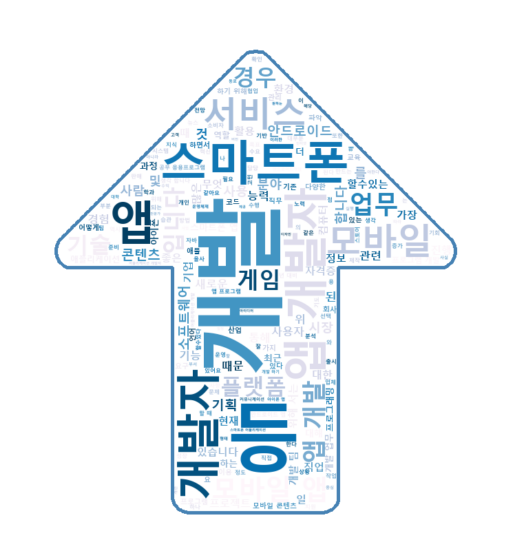

In [22]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud

we_mask = np.array(Image.open("test.png"))

wordcloud = WordCloud(
    font_path = 'C:\\Windows\\Fonts\\malgunbd.ttf',
    width = 800,
    height = 800,
    background_color="white",
    mask = we_mask,
    contour_width=5, contour_color='steelblue',
    colormap = 'PuBu'
)
#WordCloud(font_path= DATA_IN_PATH + 'HANCooljazzM.ttf').generate(query_NVA_token_sentences)
wordcloud = wordcloud.generate_from_text(str(mobile_NVA_token_sentences))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [36]:
mobile_NVA_token_sentences

'직업 개요 스마트폰 탑재 할 각종 어플리케이션 프로그램 개발 한다 업무 내용 스마트폰 탑재 할 웹어플리케이션 프로그램 아이템 기획 한다 스마트폰 가동 되는 앱 프로그램 개발 개발 된 앱 프로그램 오류 수정 새로운 버전 앱 프로그램 개발 필요 적성 능력 성격 혁신 성취 노력 책임 진취 분석 사고 독립성 흥미 탐구 예술 직업 가치관 다양성 심신 안녕 신체 활동 지적 추구 자율 업무 수행 필요 능력 창의력 전산 수리 범주 기술 분석 필요 지식 통신 컴퓨터 전자공학 의사소통 미디어 학과 기술 디자인 업무 환경 정밀 정확성 정신 업무 반복 고용 기회 앉아서 근무 새로운 기술 습득 교육 자격 스마트폰 콘텐츠 학과 최근 신설 되고있지만 스마트폰 앱 개발자 양성 목적 공부 시키는 대학 관련 학과 많지 않다 업무 특성 컴퓨터공학 전산 공학 과 소프트웨어 학과 응용소프트웨어 학과 게임 학과 등 전공 업무 하는데 도움 된다 스마트폰 출시 초기 학생 개인 개발자 만든 앱 이인기 끌었으나 시간 갈수록 개발자 기업 개발 팀 중심 시장 이재 편 되는 경향 보이 있다 이러한 앱 대한 관심 반영 듯 최근 앱 관련 학원 등 생겨나고있다 앱 개발 하기 위해 서는 그 맞는 디바이스 툴 있어야하고 기본 개발 언어 이해 필수 앱 개발자 프로그래밍 기술 기본 참신한 아이디어 그래픽 감각 갖춰 야한다 스마트폰 자체 기능 향상 된만큼 고객 그 부합 화려하고 감각 그래픽 요구 경향 있기 때문 따라서 스마트폰 가진 터치 기능 재미 주는 요소 콘텐츠 적용 창의력 필요하다 직업 전망 앞 스마트폰 앱 개발자 고용 증가 할것으로 전망 된다 이러한 스마트폰 보급 지속 확대 될것으로 예상 된다 스마트폰 가진 사람 많아짐에 따라 스마트폰 사용자 대상 날씨 여행 뉴스 운송 등 정보 제공 게임 인트라넷 편리한 기능 갖춘 어플리케이션 프로그램 개발 서비스 하려는 기업 개인 사업자 많아질것이다 스마트폰 시각 정보 인식 카메라 기능 위치 파악 케 해주는 인 텟 활용 뛰어난 그래픽 기능 갖추고있어 무궁무진 앱 프로그램 개발 할수

[1, 2, 3]

In [ ]:
len()